In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = pd.read_csv('../games_spy2.csv', parse_dates=['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19624 entries, 0 to 19623
Data columns (total 12 columns):
game               19618 non-null object
release_date       19503 non-null datetime64[ns]
price              19624 non-null float64
score              19623 non-null float64
userscore          19624 non-null float64
metascore          19624 non-null float64
owners             19624 non-null int64
playtime           19624 non-null float64
median_playtime    19624 non-null float64
developer          19536 non-null object
publisher          19479 non-null object
genre              19624 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.8+ MB


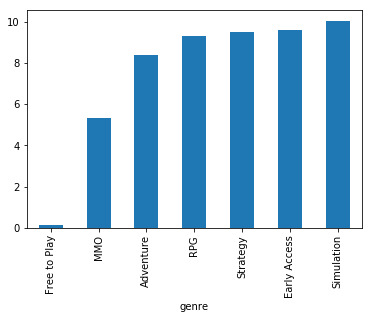

In [3]:
df.groupby('genre').price.mean().sort_values().plot(kind='bar')

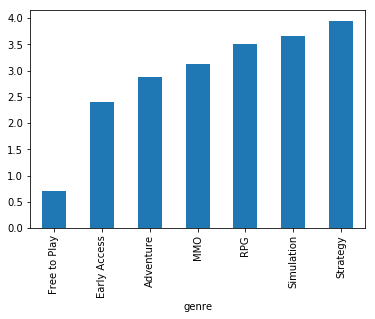

In [4]:
df.groupby('genre').median_playtime.mean().sort_values().plot(kind = 'bar')

Faz sentido, jogos de estratégia demoram mais :v

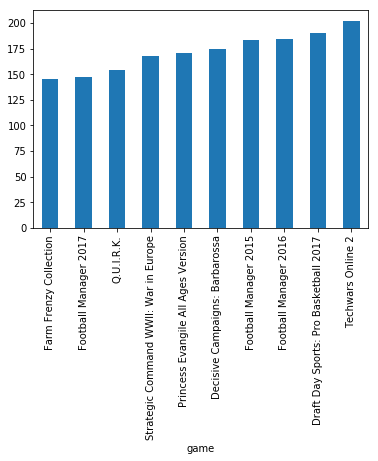

In [5]:
df.groupby('game').median_playtime.mean().sort_values().tail(10).plot(kind = 'bar')

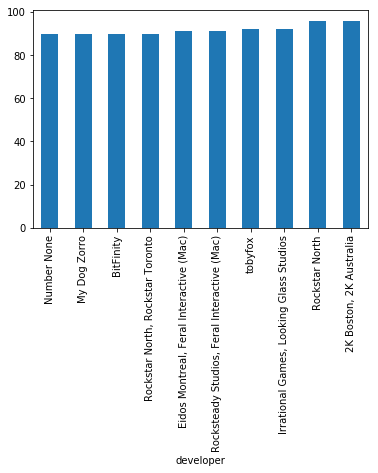

In [6]:
df.groupby('developer').metascore.mean().sort_values().tail(10).plot(kind='bar')

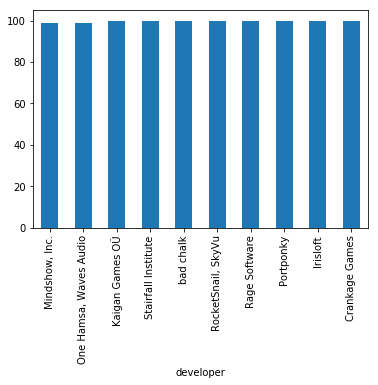

In [7]:
df.groupby('developer').userscore.mean().sort_values().tail(10).plot(kind='bar')

Opinião pública diverge bastante HAHAHA


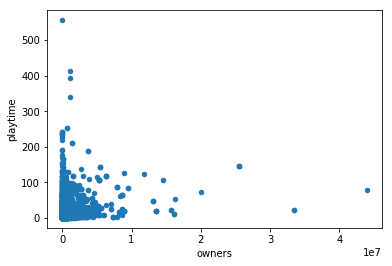

In [8]:
df.plot.scatter(x='owners', y='playtime')

Num dei faser

O preço médio dos jogos aumentou com o passar dos anos?

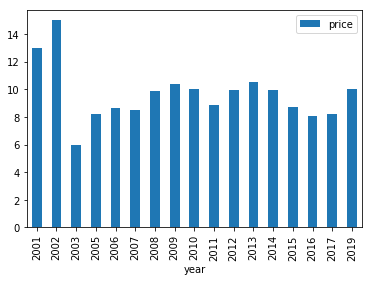

In [44]:
data = df.dropna(subset=['release_date']).copy()
data['year'] = data.release_date.apply(lambda x: x.year)
data.groupby('year').price.mean().plot(kind='bar')
plt.ylabel='price'
plt.legend(loc='best')

O preço médio dos jogos aumentou com o passar dos anos? Parece que não...

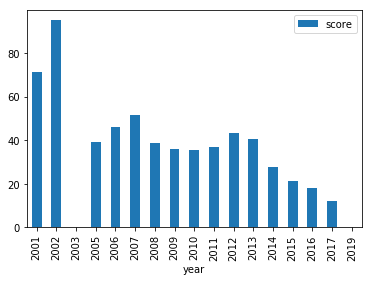

In [45]:
data.groupby('year').score.mean().plot(kind='bar')
plt.ylabel='price'
plt.legend(loc='best')

Os jogos pioraram de qualidade com o passar dos anos?

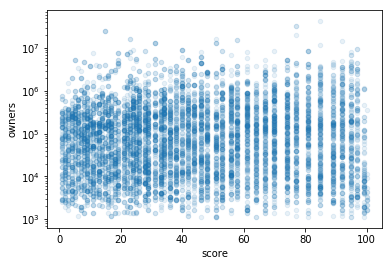

In [92]:
df[(df.score > 0) & (df.owners > 1000)].plot(x='score', y='owners', kind='scatter', logy=True, alpha=.1)

O score influencia na aquisição do jogo?

2099

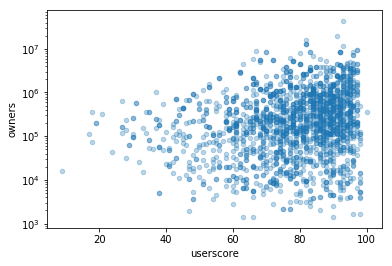

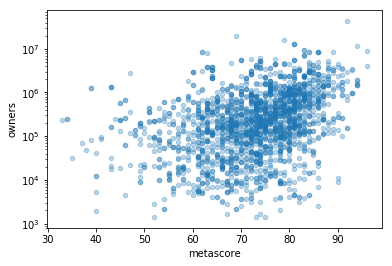

In [89]:
d = df[(df.owners > 100) & (df.userscore>0) &  (df.metascore>0)]
d.plot(x='userscore', y='owners', kind='scatter', logy=True, alpha=.3)
d.plot(x='metascore', y='owners', kind='scatter', logy=True, alpha=.3)
len(d)

Pra quem o jogador liga mais na hora de comprar? Metascore ou userscore?

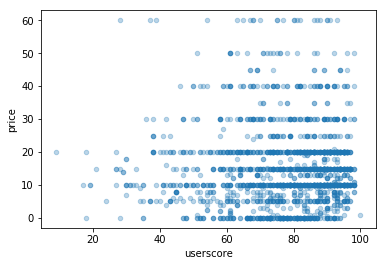

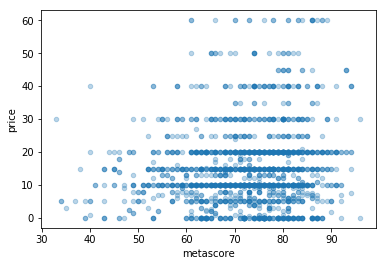

In [95]:
d.plot(x='userscore', y='price', kind='scatter', alpha=.3)
d.plot(x='metascore', y='price', kind='scatter', alpha=.3)

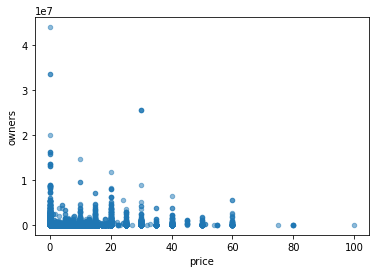

In [73]:
df.plot(x='price', y='owners', kind='scatter', alpha=.5)

O preço de um jogo influencia na sua compra? Pelo jeito sim, pois os jogos mais baratos tendem a ter mais donos... No entanto, não é uma influencia tão significativa.

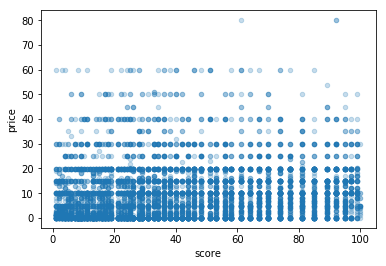

In [93]:
df[df.score>0].plot(x='score', y='price', kind='scatter',alpha=.25)

Há uma relação entre preço e score? Pelo jeito não...

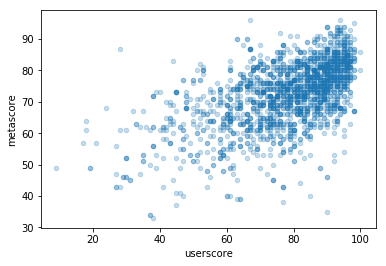

In [78]:
df[(df.userscore > 0) & (df.metascore > 0)].plot(x='userscore', y='metascore', kind='scatter', alpha=.25)

Há uma relação linear entre metascore e userscore? Surpreeendentemente não...

In [11]:
df2 = pd.read_csv('../games.csv', parse_dates=['release_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75002 entries, 0 to 75001
Data columns (total 8 columns):
url                75002 non-null object
developer          74023 non-null object
genre              74374 non-null object
overall_Reviews    59018 non-null object
price              75002 non-null float64
release_date       75002 non-null object
score              3575 non-null float64
title              74372 non-null object
dtypes: float64(2), object(6)
memory usage: 4.6+ MB


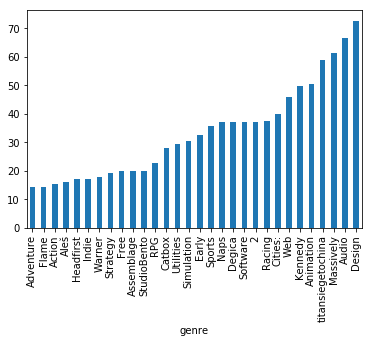

In [12]:
df2.groupby('genre').price.mean().sort_values().tail(30).plot(kind='bar')

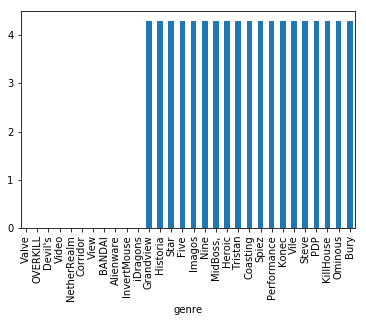

In [13]:
df2.groupby('genre').price.mean().sort_values().head(30).plot(kind='bar')

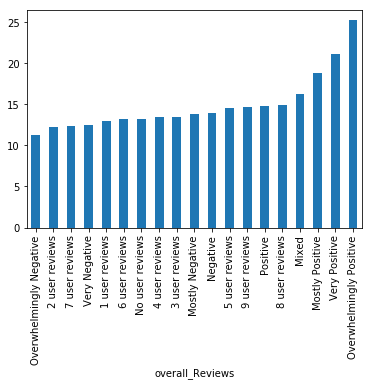

In [14]:
df2.groupby('overall_Reviews').price.mean().sort_values().plot(kind='bar')

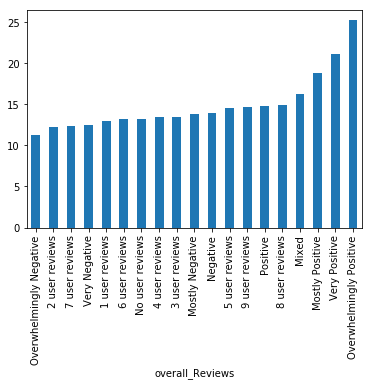

In [15]:
df2.groupby('overall_Reviews').price.mean().sort_values().plot(kind='bar')